In [2]:
import numpy as np
class DBSCAN:
  """
    Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

    Parameters:
    ----------
    eps : float
        Radius of the neighborhood around a point.
    min_samples : int
        Minimum number of points required to form a dense region (core point).
    """
  def __init__(self,eps=0.5,min_samples=5):
    self.eps = eps
    self.min_samples = min_samples
    self.labels_ = None

  def _euclidean_distance(self,a,b):
    """
    compute euclidean distance between two points
    """
    return np.sqrt(sum((a-b)**2))

  def _region_query(self,x,point_idx):
    """
    find all points within the epsilon radius of a given point
    """
    neighbors=[]
    for i in range(len(x)):
      if self._euclidean_distance(x[point_idx],x[i]) <=self.eps:
        neighbors.append(i)
    return neighbors

  def _expand_cluster(self,X, labels, point_idx, neighbors, cluster_id, visited):
    """
    Expand a cluster starting from a core point
    this method recursively adds density-reachable points to the cluster
    """
    #assign initial core point to the cluster
    labels[point_idx] = cluster_id
    i=0
    while i < len(neighbors):
      neighbor_idx = neighbors[i]

      # Visit the neighbor if it has not been visited yet
      if not visited[neighbor_idx]:
        visited[neighbor_idx] = True
        neighbor_neighbors = self._region_query(X,neighbor_idx)

        # if neighbor is also a core point, expand the neighbors
        if len(neighbor_neighbors) >= self.min_samples:
          neighbors.extend(
              n for n in neighbor_neighbors if n not in neighbors
          )

        # Assign the neighbor to the cluster if it is not already assigned
        if labels[neighbor_idx] == -1:
          labels[neighbor_idx] = cluster_id
        i += 1

    def fit(self,x):
      """
        Perform DBSCAN clustering.

        Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            Input dataset.

        Returns:
        -------
        self
        """
      x = np.array(X)
      n_samples = x.shape[0]
      # initilize all labels noise (-1)
      labels = np.full(n_samples,-1)
      # track visited points to avoid repeated processing
      visited = np.zeros(n_samples,dtype = bool)
      cluster_id = 0

      for i in range(n_samples):
        # skip  if already visited
        if visited[i]:
          continue

        visited[i] = True
        neighbors = self._region_query(x,i)
        # if not enough neighbors, mark as noise
        if len(neighbors)< self.min_samples:
          labels[i] = -1
        else:
          # create new cluster and expand it
          self._expand_cluster(x,labels,i,neighbors,cluster_id,visited)
          cluster_id +=1
      self.labels_ = labels
      return self

    def fit_predict(self,X):
       """
        Fit DBSCAN and return cluster labels.
        """
       self.fit(X)
       return self.labels_



This code defines a Python class called `DBSCAN` which implements the Density-Based Spatial Clustering of Applications with Noise algorithm.

### Key Components:
- **`__init__(self, eps=0.5, min_samples=5)`**: Initializes the DBSCAN model with two main parameters:
    - `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other. (Radius of the neighborhood).
    - `min_samples`: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

- **`_euclidean_distance(self, a, b)`**: A helper method to calculate the Euclidean distance between two points.

- **`_region_query(self, X, point_idx)`**: A helper method that finds all points within the `eps` radius of a given `point_idx`.

- **`_expand_cluster(self, X, labels, point_idx, neighbors, cluster_id, visited)`**: This method expands a cluster from a core point. It recursively adds density-reachable points to the cluster.

- **`fit(self, X)`**: This is the main method to perform DBSCAN clustering. It takes the input dataset `X`, initializes labels to noise (-1), and then iterates through each point. If a point is a core point, it expands a new cluster.

- **`fit_predict(self, X)`**: Fits the model and returns the cluster labels for each sample in `X`.

In [45]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [46]:
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.6,
    random_state=42
)


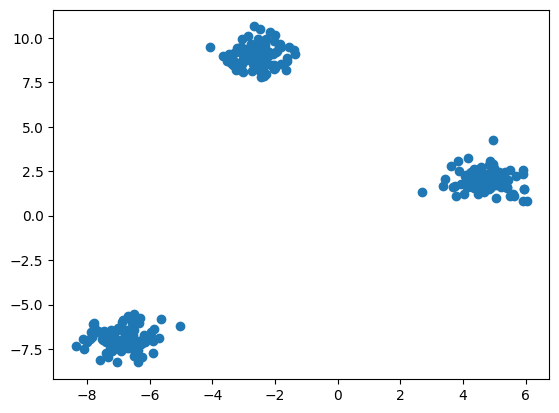

In [47]:
plt.scatter(X[:,0],X[:,1])

In [61]:
db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(X)
print(labels)

[ 0  0  1  2  0  2  1  2  1  1  1  2  1  1  0  1  0  2  1  1  1  1  2  0
  1  0  0  2  2  1  1  1  0  1  0  1  0  2  0  2  2  1  0  2  1  1  0  2
  0  2  2  0  0  1  0 -1  0  1  2  1  0  2  2 -1  0  2  2  0  0  1  2  0
  0  1  1  0  0  2  1  2  1  1  0  1  2  0  0  1  2  1  0  1  0  1  1  0
  0  1  0  0  2  1  2  1  1  1  1  1  2  0  2  1  1  1  1  2  0  2  0  2
  2  2  1  0  0  0  0  1  0  0  1  1  1  1  1  2  2  0  1  0  1  1  0  1
  2  2  2  1  2  1  1  0  2  0  1  2  2  0  0  1  1  0  0  0  1  0  2  1
  1  1  1  1  2  1  2  2  2  1  2  2  0  1  0  2  2  0  2  1 -1  2  0  0
  2  0  2  2  2  2  1  0  1  1  2  2  1  2  0  0  2  1  1  0  2  2  0  0
  0  0  1  0  0  2  0  0  1  2  0  0  2  1  1  0  1  0  2  2  0  2  0  0
  0  2  2  1  0  2  2  2  0  2  0  2  0  2  2  0  2  1  0  1  1  1  0  1
  2  2  0  2  2  1  1  2  2  2  0  0  0  1  1  1  2  2  2  2  0  2  0  2
  2  0  1  2  2  1  0  1  2  1  0  0]


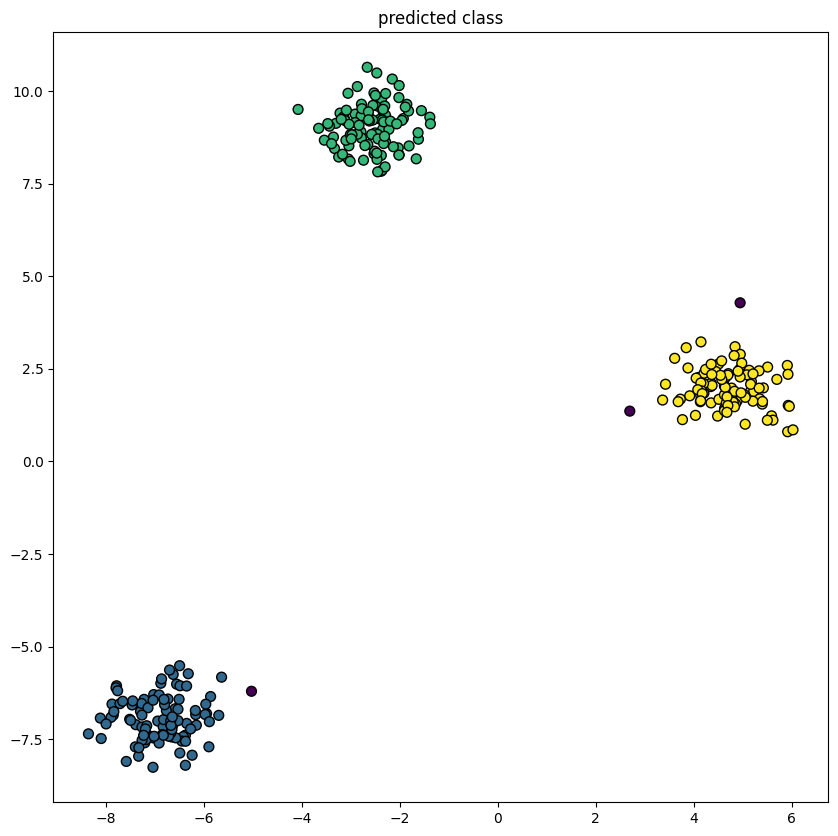

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=labels, s=50, edgecolor='k')
plt.title("predicted class")
plt.show()

In [57]:
print("unique labels assigned by Dbscan:", np.unique(labels))

unique labels assigned by Dbscan: [-1  0  1  2]


In [58]:
from sklearn.neighbors import NearestNeighbors

In [59]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

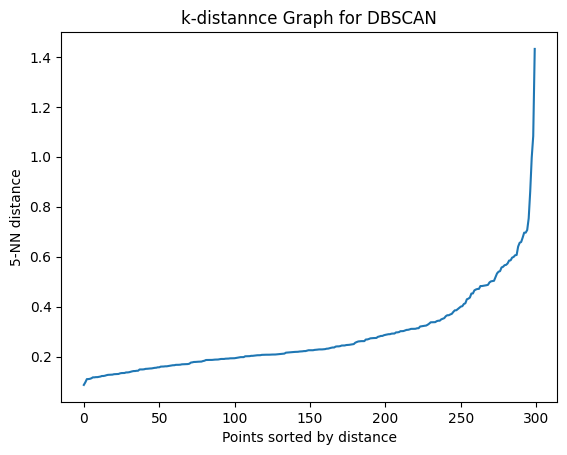

In [60]:
k_distances = np.sort(distances[:,-1])
plt.plot(k_distances)
plt.ylabel(f"{min_samples}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distannce Graph for DBSCAN")
plt.show()

**DBSCAN in High-Dimensional Data – Notes**
1️⃣ Problem: Curse of Dimensionality

As dimensionality increases, points become sparse.

The distance between points converges:

Nearest neighbor ≈ Farthest neighbor

Makes it hard to distinguish dense regions from noise.

Consequence: eps parameter becomes difficult to set, and many points may be labeled as noise.

In [63]:
# apply standardScaler or Min scaler
# reduce dimention use PCA ,UMAP/T-SNE
# min_samples 2* n_features (Higher dimensional data may require slightly larger values to avoid over-detecting noise.)